In [91]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
from sklearn import linear_model
from sklearn import preprocessing

%matplotlib inline
sns.set(style='whitegrid')

warnings.filterwarnings(
    action="ignore",
    module="sklearn",
    message="Objective did"
)

In [92]:
df = pd.read_csv(
    'https://vincentarelbundock.github.io/Rdatasets/csv/ISLR/Default.csv'
).iloc[:,1:].dropna()

# Recode strings to numeric.
df['default'] = np.where(df['default']=='Yes', 1, 0)
df['student'] = np.where(df['student']=='Yes', 1, 0)
names = df.columns
df = pd.DataFrame(preprocessing.scale(df), columns=names)

# Define the training and test sizes.
trainsize = int(df.shape[0] / 2)
df_test = df.iloc[trainsize:, :].copy()
df_train = df.iloc[:trainsize, :].copy()

Y_train = df_train['income'].values.reshape(-1, 1)
X_train = df_train.loc[:, ~(df_train.columns).isin(['income'])]


df_train['balance_student'] = df_train['balance'] * df_train['student']
df_train['balance_default'] = df_train['balance'] * df_train['default']
df_train['student_default'] = df_train['student'] * df_train['default']
df_train['balance_sqrt'] = (df_train['balance'] + 100) ** .5
df_train['balance2'] = (df_train['balance'] + 100) ** 2
df_train['balance3'] = (df_train['balance'] + 100) ** 3

X_train2 = df_train.loc[:, ~(df_train.columns).isin(['income'])]

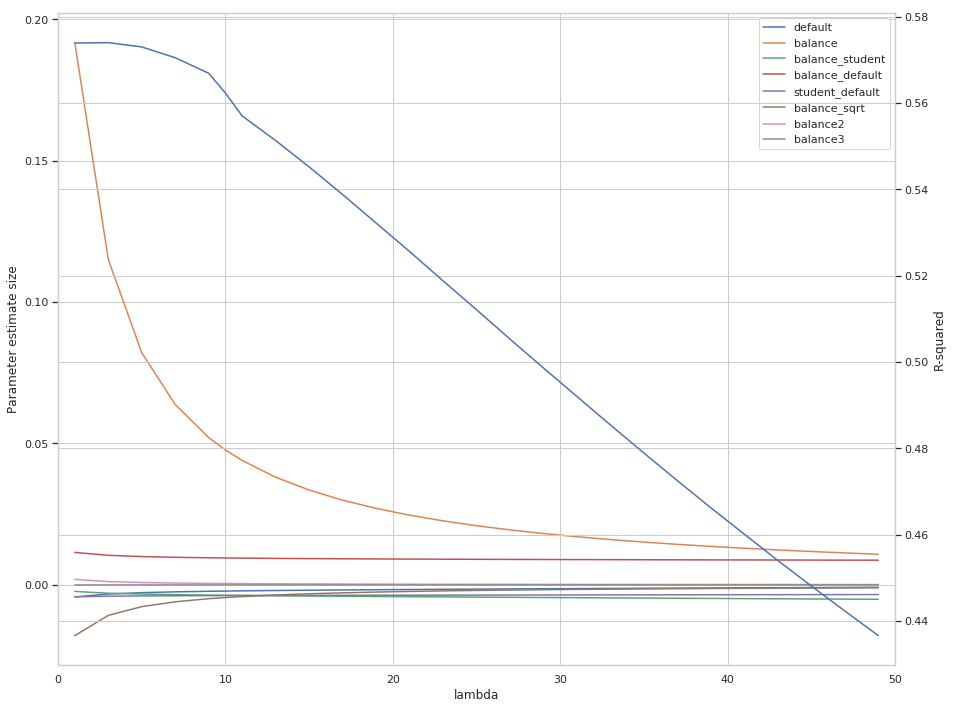

In [100]:
ridgeregrBig = linear_model.Ridge(alpha=10, fit_intercept=False)
ridgeregrBig.fit(X_train2, Y_train)
estimates = np.append(ridgeregrBig.coef_, [10])


labels = []
labels.append('R-squ')
for lambd in range(1,50,2):
    ridgeregrBig = linear_model.Ridge(alpha=lambd,fit_intercept=False)
    ridgeregrBig.fit(X_train2, Y_train)
    estimates = np.row_stack((
    estimates,
    np.append(ridgeregrBig.coef_,[lambd])))
    
r2s1 =[]
r2s1.append(round(ridgeregrBig.score(X_train2,Y_train),4))
for i in range(1,5000,200):
    ridgeregrBig = linear_model.Ridge(alpha=i,fit_intercept=False)
    ridgeregrBig.fit(X_train2, Y_train)
    r2s1.append(round(ridgeregrBig.score(X_train2,Y_train),4))
    
estimates_df = pd.DataFrame(estimates,columns=list(X_train2.columns) + ['lambda'])
estimates_df.sort_values(by='lambda', inplace=True, ascending=True)

varstoplot = list(estimates_df.columns[:9,])
varstoplot.remove('student')


fig, ax = plt.subplots(figsize=(15,12))

for var in varstoplot:
    ax.plot(estimates_df['lambda'],estimates_df[var])
    labels.append(var)
ax.set_xlabel('lambda')
ax.set_ylabel('Parameter estimate size')


ax2 = ax.twinx()
ax2.plot(estimates_df['lambda'],r2s1)
ax2.set_ylabel("R-squared")
ax.legend(labels)
plt.xlim(0,50)
plt.show()

In [94]:

r2s1 =[]
for i in range(1,5000,200):
    ridgeregrBig = linear_model.Ridge(alpha=i,fit_intercept=False)
    ridgeregrBig.fit(X_train2, Y_train)
    r2s1.append(round(ridgeregrBig.score(X_train2,Y_train),4))
    

In [95]:
print(r2s1)

[0.574, 0.573, 0.5705, 0.5669, 0.5623, 0.557, 0.5513, 0.5452, 0.5388, 0.5322, 0.5256, 0.5188, 0.5121, 0.5053, 0.4986, 0.492, 0.4854, 0.4789, 0.4725, 0.4662, 0.4601, 0.454, 0.4481, 0.4423, 0.4366]


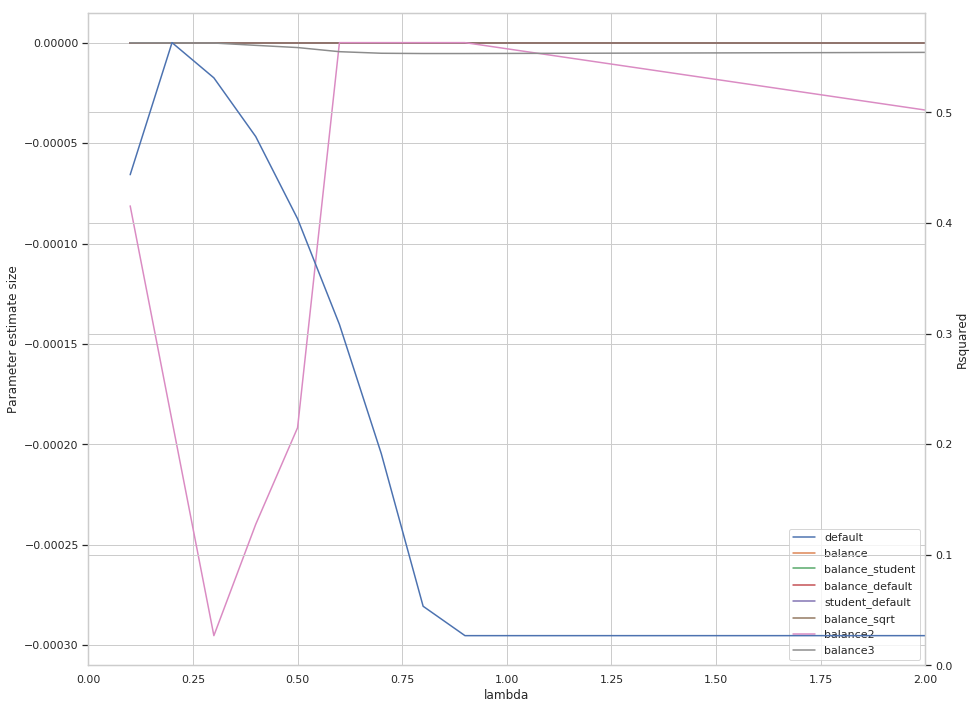

In [96]:
lassBig = linear_model.Lasso(alpha=.35)
lassBig.fit(X_train2, Y_train)
estimates = np.append(lassBig.coef_, [10])
r2s =[]
r2s.append(lassBig.score(X_train2,Y_train))
labels =[]
for i in np.arange(0.1, 1, 0.1):
    lassBig = linear_model.Lasso(alpha=i)
    lassBig.fit(X_train2, Y_train)
    r2s.append(lassBig.score(X_train2, Y_train))
    estimates = np.row_stack((
    estimates,
    np.append(lassBig.coef_,[i])))
    
    

estimates_df = pd.DataFrame(estimates,columns=list(X_train2.columns) + ['lambda'])
estimates_df.sort_values(by='lambda', inplace=True, ascending=True)
varstoplot = list(estimates_df.columns[:9,])
varstoplot.remove('student')

fig, ax = plt.subplots(figsize=(15,12))

for var in varstoplot:
    ax.plot(estimates_df['lambda'],estimates_df[var])
    labels.append(var)
ax.set_xlabel('lambda')
ax.set_ylabel('Parameter estimate size')


ax2 = ax.twinx()
ax2.plot(estimates_df['lambda'],r2s)
ax2.set_ylabel("Rsquared")
ax.legend(labels)
plt.xlim(0,2)
plt.show()

In [97]:
r2s

[0.44363376712897074,
 0.563089493671649,
 0.5312352331355782,
 0.4781445089581413,
 0.40381485553039165,
 0.3082496073309636,
 0.19144674105687853,
 0.0534078143406329,
 0.02683413474903795,
 0.026834134561415365]

In [98]:
print(r2s)

[0.44363376712897074, 0.563089493671649, 0.5312352331355782, 0.4781445089581413, 0.40381485553039165, 0.3082496073309636, 0.19144674105687853, 0.0534078143406329, 0.02683413474903795, 0.026834134561415365]
